In [2]:
import os
import shutil

pdb_path = '/home/lwang/AI-HDX-main/HDX_MS_dataset/database_collection'
# Get a list of all pdb files in the subfolder
save_path = '/home/lwang/AI-HDX-main/HDX_MS_dataset/database_collection/feature/HDX_files'
subfolder = os.listdir(pdb_path)
count = 0
for folder in subfolder:
    if folder.split('.')[0] == '':
        continue
    elif folder == 'feature':
        continue
    
    if os.path.isfile(f'{pdb_path}/{folder}/apo_revised_modified.xlsx'):
        shutil.copy(os.path.join(pdb_path, folder, f'apo_revised_modified.xlsx'), os.path.join(save_path, f'{folder}.xlsx'))
        count += 1
print(count)


36


feature output: dssp, rigidity

In [2]:
## output dssp (RSA) for each amino acid  ##
from RUN_FIRST import pdb_clean
from output_dssp import output_dssp
import pandas as pd
import os
import warnings
from Bio import PDB

warnings.filterwarnings("ignore")

root_dir = '/home/lwang/models/HDX_LSTM/data/RTT_BCD'
pdb_dir = f'{root_dir}/structure'
dssp_dir = f'{root_dir}/dssp_files'
if os.path.isdir(dssp_dir) == False:
    os.mkdir(dssp_dir)

#fname = 'COVID_record.xlsx'
#apo_df = pd.read_excel(f'{root_dir}/{fname}', sheet_name='Sheet1')
#apo_df = apo_df.dropna(subset=['apo_identifier'])
fail_list = []

#for index, row in apo_df.iterrows():
#    pdb_fname = row['apo_identifier'].strip().split('.')[0]
    #chain_id = row['chain_identifier'].strip()
    #uni_id = row['match_uni'].strip()
for pdb in os.listdir(pdb_dir):
    pdb_fname = pdb.split('.')[0]        
    if os.path.isfile(f'{root_dir}/structure/{pdb_fname}.pdb'):
        try:
            parser = PDB.PDBParser()
            filepath = f'{root_dir}/structure/{pdb_fname}.pdb'
            structure = parser.get_structure('AF_structure', filepath)
            chain_ids = list(structure.get_chains())

            if not os.path.isfile(f'{root_dir}/structure/{pdb_fname}_clean.pdb'):
                pdb_clean(f'{root_dir}/structure/{pdb_fname}.pdb', f'{root_dir}/structure/{pdb_fname}_clean.pdb')
            print('start processing', f'{pdb_fname}')    

            
            for chain_id in chain_ids:
                chain_id = chain_id.get_id()
                if os.path.isfile(f'{root_dir}/dssp_files/{pdb_fname}_{chain_id}.dssp.txt'):
                    continue
            
            output_dssp(f'{pdb_fname}', f'{root_dir}/structure/{pdb_fname}_clean.pdb', f'{root_dir}/dssp_files', 
                        dssp_path='/home/lwang/models/mambaforge/envs/liyao_env/bin/mkdssp')

        except Exception as e:
            fail_list.append(pdb_fname)
            print(e)
            continue
    else:
        print(f'{root_dir}/structure/{pdb_fname}.pdb does not exist')
print(fail_list) #FIXME: add b-factor col to the pdb file

start processing model_3_revised
start processing model_4_revised
start processing model_5_revised
start processing model_6_revised
start processing model_7_revised
start processing model_8_revised
start processing model_9_revised
start processing model_10_revised
start processing model_11_revised
start processing model_12_revised
start processing model_13_revised
start processing model_14_revised
start processing model_15_revised
start processing model_16_revised
start processing model_17_revised
start processing model_18_revised
start processing model_19_revised
start processing model_20_revised
start processing model_21_revised
start processing model_22_revised
start processing model_23_revised
start processing model_24_revised
start processing model_25_revised
start processing model_26_revised
start processing model_27_revised
start processing model_28_revised
start processing model_29_revised
start processing model_30_revised
start processing model_31_revised
start processing mode

In [1]:
from Bio.Data.PDBData import protein_letters_1to3
from Bio.PDB.Polypeptide import is_aa, protein_letters_3to1_extended
non_StdAA = ['TRO', 'PYR', 'SNN', 'PTR', 'PCA']

def get_pdb_seq(structure, chain_id = 'A', fill_gap = True):
    if len(structure) == 0: #if succussfully read the pdb file
        return None, None
    
    chains = list(structure.get_chains())

    for chain in chains:
        if not chain_id == chain.id:
            continue

        sequence = ""

        previous_residue_id = None
        residue_indices = {}

        for residue in chain:
            residue_name = residue.get_resname()
            #if residue_name == "MSE":
            #    residue_name = "MET"

            if not is_aa(residue_name, standard=False) and residue_name != "MET":
                continue  # Skip the non-amino acid residue
            else:
                if residue_name in non_StdAA:
                    aa = '-'
                else:
                    aa = protein_letters_3to1_extended.get(residue_name)
                idx = int(residue.id[1])
                residue_indices[idx] = protein_letters_3to1_extended.get(residue_name) # this makes sequence have '-' while residue_list transform to normal aa

            # Check for discontinuity
            current_residue_id = residue.get_id()[1]
            if fill_gap:
                if previous_residue_id is not None and current_residue_id != previous_residue_id + 1:
                    gap_size = current_residue_id - previous_residue_id - 1
                    sequence += "-" * gap_size
            try:
                sequence += aa
            except Exception as e:
                print(residue_name, aa, '//')
                return False, False
            previous_residue_id = current_residue_id

    return sequence, residue_indices

In [2]:
### output fasta file for hhblits ###
#from predataprocess import get_pdb_seq
from Bio import PDB
import pandas as pd
import os
import warnings
warnings.filterwarnings("ignore")

root_dir = '/home/lwang/models/HDX_LSTM/data/Latest_test'
fail_list = []
pdb_dir = f'{root_dir}/revised_structure'
pdb_list = os.listdir(pdb_dir)
for pdb_name in pdb_list:
    pdb_fname = pdb_name.split('.')[0]
    #if pdb_fname.startswith('model'):
    #    continue
    print('start processing', f'{pdb_fname}')        
    if os.path.isfile(f'{pdb_dir}/{pdb_fname}.pdb'):
        #try:
        parser = PDB.PDBParser()
        filepath = f'{pdb_dir}/{pdb_fname}.pdb'
        structure = parser.get_structure('AF_structure', filepath)
        chain_ids = list(structure.get_chains())
        for chain_id in chain_ids:
            chain_id = chain_id.get_id()
            if chain_id == 'Z': #skip the heteroatoms chain
                continue
            sequence, residue_indices = get_pdb_seq(structure, chain_id)
            if os.path.isdir(f'{root_dir}/fasta_files') == False:
                os.mkdir(f'{root_dir}/fasta_files')
            with open(f'{root_dir}/fasta_files/{pdb_fname}_{chain_id}.fasta', 'w') as f:
                f.write(f'>{pdb_fname}_{chain_id}\n')
                f.write(sequence)
        #except Exception as e:
        #    print(e)
        #    fail_list.append(pdb_fname+'_'+chain_id)
        #    continue
    else:
        print(f'{pdb_dir}/{pdb_fname}.pdb does not exist')
print(fail_list)

start processing 1EUG
start processing 1UGH
start processing 1UGI
start processing 2ERK
start processing 3DVL
start processing 3KVD
start processing 4KSO
start processing 4QTE
start processing 5K4I
start processing 5UMO
start processing 6GDQ
start processing 6OPH
start processing 6OPK
start processing 8U8J
start processing 8U8K
[]


In [1]:
### output fasta file for hhblits ###
from Bio import PDB
from Bio.PDB.Polypeptide import CaPPBuilder
import warnings
import os
import pandas as pd

warnings.filterwarnings("ignore")
root_dir = '/home/lwang/models/HDX_LSTM/data/Latest_set'
fail_list = []
#pdb_list = os.listdir(f'{root_dir}/structure')
df = pd.read_excel(f'{root_dir}/merged_data.xlsx', sheet_name='Sheet1')
df = df.dropna(subset=['structure_file'])
df = df.drop_duplicates(subset=['structure_file'])
pdb_list = df['apo_identifier'].tolist()
for pdb_name in pdb_list:
    pdb_fname = pdb_name.split('.')
    if len(pdb_fname) > 1:
        pdb_fname = ''.join(pdb_fname[:-1])
    else:
        pdb_fname = pdb_fname[0]
    print('start processing', f'{pdb_fname}')        
    if os.path.isfile(f'{root_dir}/structure/{pdb_fname}.pdb'):
        try:
            parser = PDB.PDBParser()
            filepath = f'{root_dir}/structure/{pdb_fname}.pdb'
            structure = parser.get_structure('AF_structure', filepath)
            chains = structure.get_chains()
            for chain in chains:
                chain_id = chain.get_id()
                hhm_path = f'{root_dir}/hhm_files/{pdb_fname}_{chain_id}.hhm'
                if os.path.isfile(hhm_path):
                    continue

                ppb = CaPPBuilder()
                seq = ''
                for pp in ppb.build_peptides(chain, aa_only=False):
                    seq+=str(pp.get_sequence())
                if os.path.isdir(f'{root_dir}/fasta_files') == False:
                    os.mkdir(f'{root_dir}/fasta_files')
                with open(f'{root_dir}/fasta_files/{pdb_fname}_{chain_id}.fasta', 'w') as f:
                    f.write(f'>{pdb_fname}_{chain_id}\n')
                    f.write(seq)
        except Exception as e:
            print(e)
            fail_list.append(pdb_fname)
            continue

start processing bcd_6NZ2
start processing rtt_3FSS
start processing rtt_bcd_6thl
start processing rtt+bcd_complex_revised
start processing model_1_revised
start processing model_2_revised
start processing model_3_revised
start processing model_4_revised
start processing model_5_revised
start processing model_6_revised
start processing model_7_revised
start processing model_8_revised
start processing model_9_revised
start processing model_10_revised
start processing model_11_revised
start processing model_12_revised
start processing model_13_revised
start processing model_14_revised
start processing model_15_revised
start processing model_16_revised
start processing model_17_revised
start processing model_18_revised
start processing model_19_revised
start processing model_20_revised
start processing model_21_revised
start processing model_22_revised
start processing model_23_revised
start processing model_24_revised
start processing model_25_revised
start processing model_26_revised
st

In [ ]:
### secondary structure one-hot encoding ###
root_dir = '/home/lwang/models/HDX_LSTM/data/test_set'
dssp_dir = f'{root_dir}/dssp_files'

def one_of_k_encoding(x, allowable_set):
    if x not in allowable_set:
        raise Exception("input {0} not in allowable set{1}:".format(x, allowable_set))
    return [int(x == s) for s in allowable_set]

folder_list = os.listdir(dssp_dir)
for folder in folder_list:
    if folder == '.DS_Store':
        continue

    dssp_file = f'{dssp_dir}/{folder}'
    with open(dssp_file, 'r') as f:
        for line in f:
            content = line.split()
            dssp_value = round(float(content[3]), 4)
            ss_type = content[2]
            ss_list = ['H', 'B', 'E', 'G', 'I', 'T', 'S', 'P', '-']
            ss_encoding = one_of_k_encoding(ss_type, ss_list)
            print(ss_type)
            print(ss_encoding)
/home/lwang/AI-HDX-main/HDX_MS_dataset/database_collection/feature/fasta_files

In [ ]:
### add H to pdb file, then run FIRST ###
### usually need to run separately in terminal ###
import os
import shutil
from RUN_FIRST import RUN_FIRST, copyfiles, pdb_clean, hbplus

root_dir = '/home/lwang/models/HDX_LSTM/data/COVID_SPIKE'
proflex_dir = f'/home/lwang/AI-HDX-main/ProteinComplex_HDX_prediction/prog/ProFlex-master/proflex'
hbplus_dir = '/home/lwang/AI-HDX-main/ProteinComplex_HDX_prediction/prog/hbplus'

pdb_dir = f'{root_dir}/structure'
save_dir = f'{root_dir}/proflex_files'

if os.path.isdir(save_dir) == False:
    os.mkdir(save_dir)

fname = 'COVID_record.xlsx'
apo_df = pd.read_excel(f'{root_dir}/{fname}', sheet_name='Sheet1')
apo_df = apo_df.dropna(subset=['chain_identifier'])

for index, row in apo_df.iterrows():
    pdb_fname = row['apo_identifier'].strip().split('.')[0]
    #chain_id = row['chain_identifier'].strip()
    #uni_id = row['match_uni'].strip()

    pdb_fpath = f'{root_dir}/structure/{pdb_fname}.pdb'

    proflex_name = f'{pdb_fname}_clean_Hplus_proflexdataset'
    if os.path.isfile(f'{save_dir}/{proflex_name}'):
        continue           
    
    if os.path.isfile(pdb_fpath):
        try:
            print('start processing', f'{pdb_fname}') 
            pdb_folder = f'{root_dir}/structure/'
            if pdb_clean(pdb_fpath, f'{hbplus_dir}/{pdb_fname}_clean.pdb') == False:
                raise Exception('pdb_clean failed')
            hbplus(hbplus_dir, f'{pdb_fname}_clean', pdb_folder)

            pdb_fname = pdb_fname+'_clean_Hplus'       
            pdb_clean(f'{pdb_folder}/{pdb_fname}.pdb', f'{proflex_dir}/{pdb_fname}.pdb')
            RUN_FIRST(proflex_dir, f'{pdb_fname}.pdb', '-h')
            copyfiles(pdb_fname, proflex_dir, save_dir)

        except Exception as e:
            fail_list.append(pdb_fname)
            print(e)
            continue
print(fail_list)

In [ ]:
### add H to single pdb file ###
from RUN_FIRST import hbplus, pdb_clean

hbplus_dir = '/Users/liyao/Desktop/Tsuda_Lab/Source_code/hbplus/'
pdb_dir = f'/Users/liyao/Desktop/Tsuda_Lab/Source_code/AI-HDX-main/HDX_MS_dataset/database_collection/feature/structure/B5BTR7'
file = 'AF-B5BTR7-F1-model_v4.pdb'

pdb_clean(f'{pdb_dir}/{file}', f'{hbplus_dir}/{file}')
hbplus(hbplus_dir, file, pdb_dir)

In [5]:
### convert proflex output to ASSURR flexibility index ###
import os
import pandas as pd
from Bio import PDB
from prot_rigidity import ASSURR_flexibility

root_dir = '/home/lwang/models/HDX_LSTM/data/COVID_SPIKE'
proflex_dir = f'{root_dir}/proflex_files'
dssp_dir = f'{root_dir}/dssp_files'
save_dir = f'{root_dir}/rigidity_files'
if os.path.isdir(save_dir) == False:
    os.mkdir(save_dir)

fname = 'COVID_record.xlsx'
apo_df = pd.read_excel(f'{root_dir}/{fname}', sheet_name='Sheet1')
apo_df = apo_df.dropna(subset=['chain_identifier'])
fail_list = []

for index, row in apo_df.iterrows():
    pdb_fname = row['apo_identifier'].strip().split('.')[0]
    print('start processing', f'{pdb_fname}')        
    if os.path.isfile(f'{root_dir}/structure/{pdb_fname}.pdb'):
        parser = PDB.PDBParser()
        filepath = f'{root_dir}/structure/{pdb_fname}.pdb'
        structure = parser.get_structure('AF_structure', filepath)
        #chain_ids = list([chain.id for chain in structure.get_chains()])
        chain_ids = ['A', 'B', 'C']
        dssp_file = [f'{dssp_dir}/{pdb_fname}_{chain_id}.dssp.txt' for chain_id in chain_ids]
        ASSURR_flexibility(pdb_fname, dssp_file, proflex_dir, save_dir)

start processing Wuhan_spike
extracted ss list shape: (3198,)
processing Wuhan_spike
start processing Omicron_spike
extracted ss list shape: (3307,)
processing Omicron_spike
start processing Delta_spike
extracted ss list shape: (3228,)
processing Delta_spike


In [2]:
# calculate Relative fractional uptake (RFU) by PyHDX and correct for temperature and pH
from pyhdx import read_dynamx, HDXMeasurement
from pyhdx.process import filter_peptides, apply_control, correct_d_uptake
from pyhdx.plot import peptide_coverage
import proplot as pplt
from pathlib import Path

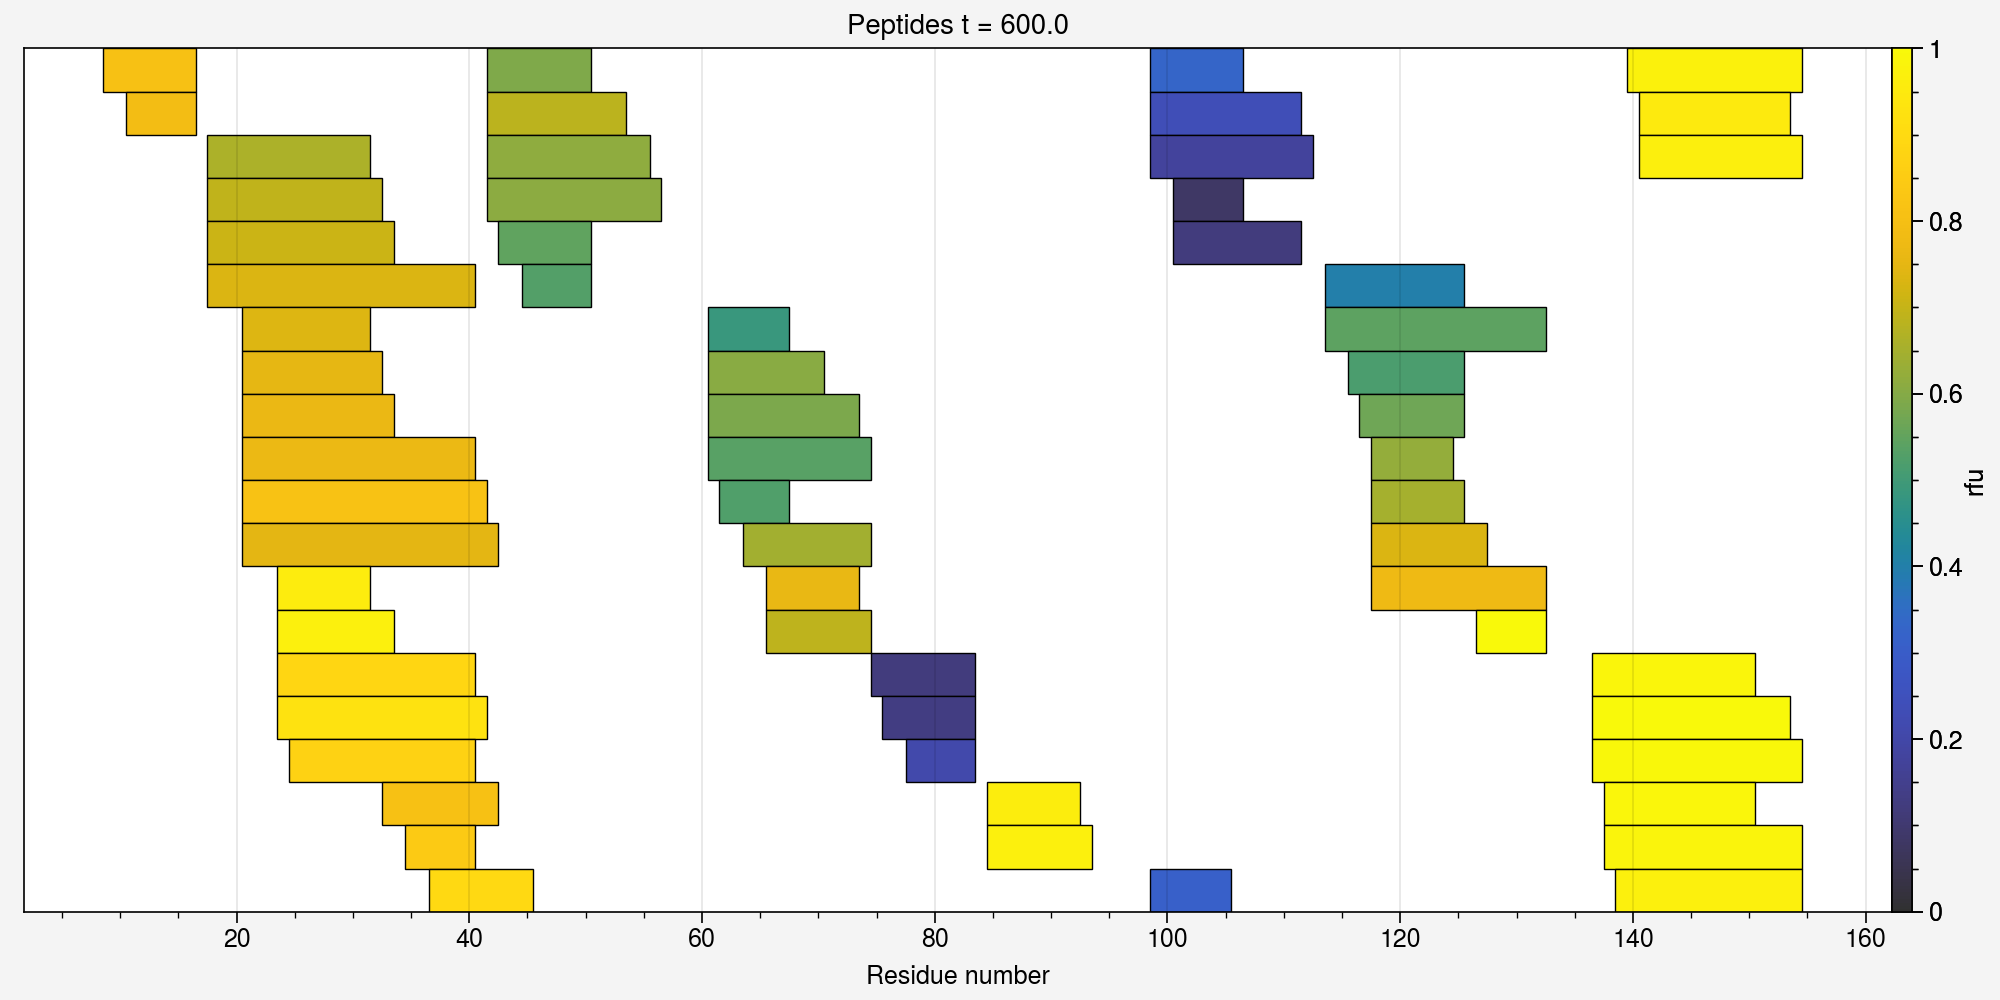

In [12]:
fpath = '/home/lwang/AI-HDX-main/ProteinComplex_HDX_prediction/BiLSTM+GAT_v2/pepGraph_generation/tool/test.csv'

data = read_dynamx(fpath, time_conversion=("min", "s"))

peptides = filter_peptides(data, state="SecB WT apo", query=["exposure > 0."])
peptides["state"].unique(), peptides["exposure"].unique()

# Filter out peptides for the full deuteration control
fd_df = filter_peptides(data, state="Full deuteration control", exposure=60 * 0.167)
fd_df["state"].unique(), fd_df["exposure"].unique()

peptides_control = apply_control(peptides, fd_df, nd_control=None)

peptides_corrected = correct_d_uptake(peptides_control, drop_first=2, d_percentage=90.0)

sequence = "MSEQNNTEMTFQIQRIYTKDISFEAPNAPHVFQKDWQPEVKLDLDTASSQLADDVYEVVLRVTVTASLGEETAFLCEVQQGGIFSIAGIEGTQMAHCLGAYCPNILFPYARECITSMVSRGTFPQLNLAPVNFDALFMNYLQQQAGEGTEEHQDA"
temperature, pH = 273.15 + 30, 8.0

hdxm = HDXMeasurement(
    peptides_corrected, sequence=sequence, pH=pH, temperature=temperature, name="My HDX measurement"
)

fig, ax = pplt.subplots(figsize=(10, 5))
i = 4
peptide_coverage(ax, hdxm[i].data, 20, cbar=True)
t = ax.set_title(f"Peptides t = {hdxm.timepoints[i]}")
l = ax.set_xlabel("Residue number")



In [1]:
import pandas as pd
import os
from polyR_model import seq_embedding

def prepare_data():
    apo_df = pd.DataFrame()
    mutation_df = pd.DataFrame()
    apo_count = 0
    mutation_count = 0 
    root_dir = "/Users/liyao/Desktop/Tsuda_Lab/Source_code/AI-HDX-main/HDX_MS_dataset/database_collection"
    apo_path = f"{root_dir}/merged_apo.xlsx"
    apo_df = pd.read_excel(apo_path, sheet_name='Sheet1')
    apo_df = apo_df.dropna(subset=['chain_identifier'])

    manager_path = f"{root_dir}/manager.txt"
    manager = open(manager_path, 'r')
    manager.readline()
    available_list = []
    for line in manager:
        content = line.split(':')
        available_list.append(content[0])

    input_array = []
    truth_array = []
    error_id = []

    for index, row in apo_df.iterrows():
        identidier = row['database_id'].strip()
        if identidier not in available_list:
            continue
        uni_id = row['match_uni'].strip()
        state = row['state'].strip()
        apo_pdb = row['apo_identifier'].strip().split('.')[0]
        chain_id = row['chain_identifier'].strip()

        #print(identidier, uni_id, state)

        example_input = f"{root_dir}/{identidier}/apo_revised_modified.xlsx"
        mut_intput = f"{root_dir}/{identidier}/mutation_revised_modified.xlsx"
        example_embedding = f'{root_dir}/feature/embedding_files/{apo_pdb}_{chain_id}.embedding.txt'
        if os.path.isfile(example_embedding) == False or os.path.isfile(example_input) == False:
            #print(example_embedding, example_input)
            continue
        
        if os.path.isfile(mut_intput):
            temp_apo_df = pd.read_excel(example_input, sheet_name='Sheet1')
            #temp_mutation_df = pd.read_excel(mut_intput, sheet_name='Sheet1')

            apo_df = pd.concat([apo_df, temp_apo_df], ignore_index=True)
            #mutation_df = pd.concat([mutation_df, temp_mutation_df], ignore_index=True)

        prot1, truth, start_pos, end_pos, log_t = seq_embedding(example_input, example_embedding, state)
        input_array.append(prot1)
        truth_array.extend(truth)

    #apo_df = apo_df.drop_duplicates(subset=['sequence'], keep='first')
    #mutation_df = mutation_df.drop_duplicates(subset=['sequence'], keep='first')
    #print(apo_df.shape[0], mutation_df.shape[0])
    return input_array, truth_array

## FIXME: currently can iterate through all the files, but there are many mismatch records ##
## FIXME: consider the exposure time, there are 20k pep apo sequences ##

(2860, 30, 47) (2860,)
training x: (2002, 30)
training y: (2002,)
test x: (858, 30)
test y: (858,)
R2 score: 0.5971016425258246
RMSE: 0.1270722172104855
Pearson: PearsonRResult(statistic=0.7854299226519129, pvalue=1.5764380066335197e-180)


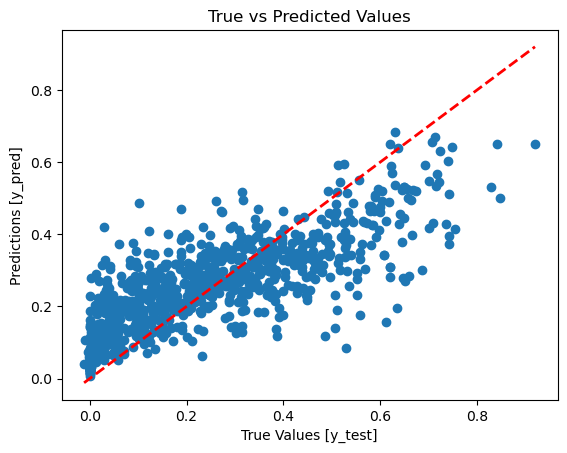

In [2]:


import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

input_array = []
truth_array = []
input_array, truth_array = prepare_data()
input_array = np.concatenate(input_array, axis=0)
truth_array = np.array(truth_array)/100

'''
# Find indices where NaNs are present in input_array and truth_array
nan_indices_input = np.where(np.isnan(input_array).any(axis=(1, 2)))[0]
nan_indices_truth = np.where(np.isnan(truth_array))[0]

# Combine the indices
nan_indices = np.union1d(nan_indices_input, nan_indices_truth)

# Filter out rows with NaNs in both arrays
input_array_filtered = np.delete(input_array, nan_indices, axis=0)
truth_array_filtered = np.delete(truth_array, nan_indices)

print(f"Original input_array shape: {input_array.shape}")
print(f"Filtered input_array shape: {input_array_filtered.shape}")
print(f"Original truth_array shape: {truth_array.shape}")
print(f"Filtered truth_array shape: {truth_array_filtered.shape}")
'''
# featrue format[1-47]: 1: SASA, 2-6: HDMD,  7-15:ss one-hot, 16:rigidity,   17-46: HHblits, 47: log_time
x = input_array.reshape(input_array.shape[0], -1, input_array.shape[1])
#indices = list(range(1, 47))
#x= np.delete(x, indices, axis=-1)

y = truth_array
x = x + 1e-10
print(x.shape, y.shape)

np.save('/Users/liyao/Desktop/Tsuda_Lab/Source_code/AI-HDX-main/HDX_MS_dataset/database_collection/feature/x_drop_duplicate.npy', x)
np.save('/Users/liyao/Desktop/Tsuda_Lab/Source_code/AI-HDX-main/HDX_MS_dataset/database_collection/feature/y_drop_duplicate.npy', y)


x = np.mean(x, axis=2)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

print('training x:', x_train.shape)
print('training y:', y_train.shape)
print('test x:', x_test.shape)
print('test y:',y_test.shape)

try:
# Initialize the Random Forest Regressor
    random_forest_model = RandomForestRegressor(n_estimators=100, random_state=50, max_features='sqrt')
    random_forest_model.fit(x_train, y_train)
    y_pred = random_forest_model.predict(x_test)

    print('R2 score:', r2_score(y_test, y_pred))
    print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
    print('Pearson:', pearsonr(y_test, y_pred))

    plt.scatter(y_test, y_pred)
    plt.xlabel('True Values [y_test]')
    plt.ylabel('Predictions [y_pred]')
    plt.title('True vs Predicted Values')

    # Optional: add a line representing perfect predictions
    max_value = max(y_test.max(), y_pred.max())
    min_value = min(y_test.min(), y_pred.min())
    plt.plot([min_value, max_value], [min_value, max_value], color='red', linestyle='--', lw=2)

    plt.show()      
except Exception as e:
    print(e)


In [17]:
### save model ###
from joblib import dump, load

root_dir = "/Users/liyao/Desktop/Tsuda_Lab/Source_code/AI-HDX-main/HDX_MS_dataset/database_collection"
model_path = f"{root_dir}/feature/model_files/RF_240123.joblib"
dump(random_forest_model, model_path)

['/Users/liyao/Desktop/Tsuda_Lab/Source_code/AI-HDX-main/HDX_MS_dataset/database_collection/feature/model_files/RF_240123.joblib']